In [1]:
import graph_tool.all as gt
import networkx as nx
import os
import matplotlib.pyplot as plt

In [2]:
Node = 10000

m = 2

times = 100

beta_list = [1,1/2,0,-1,-5,-100]

net_list = ["SF", "Cutoff", "RA", "IPA_beta1", "IPA_beta5", "IPA_beta100"]

In [3]:
for net in net_list:
    for i in range(times):
        # graph-toolのグラフを読み込む
        g = gt.load_graph(f"~/o_t_hayashilab/Ogawa_Network/N={Node}/{net}/{i}.gt.gz")

        # networkxのグラフオブジェクトを作成
        G = nx.Graph()
        
        # graph-toolのノードをnetworkxのノードに追加
        node_map = {}  # graph-toolのノードとnetworkxのノードの対応を保持する辞書
        for node_gt in g.vertices():
            node_map[node_gt] = int(node_gt) + 1  # node_gtをそのまま使うのではなく、intに変換して使用
        
        for node in node_map.values():
            G.add_node(node)

        # graph-toolのエッジをnetworkxのエッジに追加
        for edge_gt in g.edges():
            node_u = node_map[edge_gt.source()]
            node_v = node_map[edge_gt.target()]
            G.add_edge(node_u, node_v)
        
        # 出力ディレクトリを作成
        output_dir = os.path.expanduser(f"~/o_t_hayashilab/Ogawa_Network/NetworkX/N={Node}/{net}")
        os.makedirs(output_dir, exist_ok=True)

        # networkxのグラフを.netファイル形式で保存
        output_path = os.path.join(output_dir, f"{i}.net")
        
        with open(output_path, 'w') as f:
            f.write(f"*Vertices {G.number_of_nodes()}\n")
            f.write("*Edges\n")
            for edge in G.edges():
                f.write(f"{edge[0]} {edge[1]}\n")

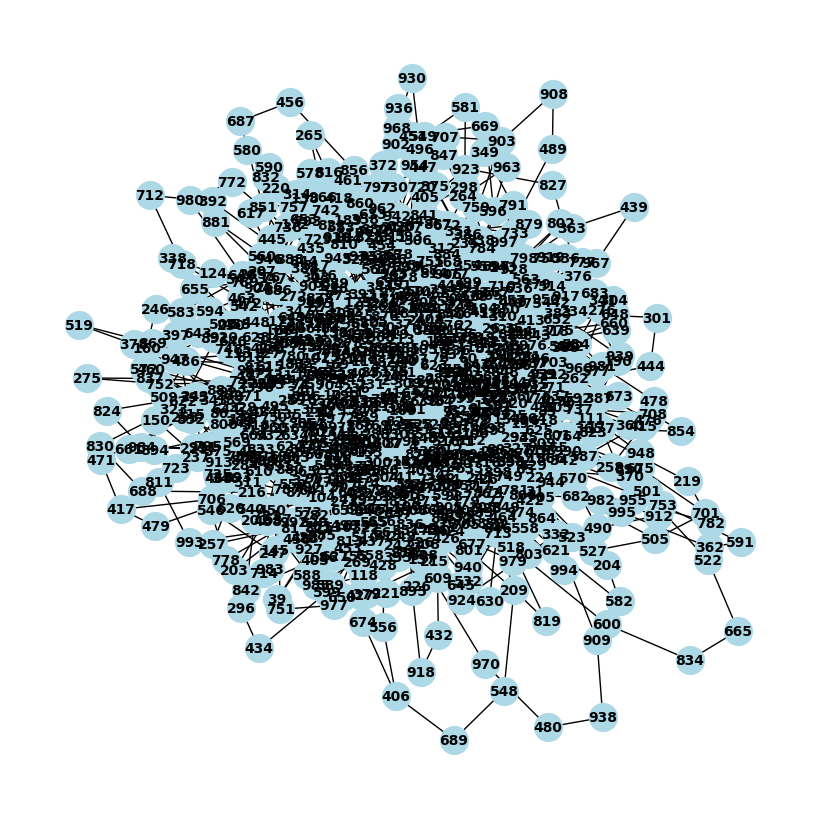

In [30]:
# 可視化するためのnetファイルのパスを指定
net_file = os.path.expanduser(f"~/o_t_hayashilab/Ogawa_Network/NetworkX/N={Node}/{net_list[0]}/0.net")

# networkxのグラフを.netファイルから読み込み
with open(net_file, 'r') as f:
    lines = f.readlines()

# ノードとエッジのリストを作成
nodes = []
edges = []
in_edges_section = False

for line in lines:
    if line.startswith('*Vertices'):
        continue
    elif line.startswith('*Edges'):
        in_edges_section = True
        continue
    
    if in_edges_section:
        edge = line.split()
        if len(edge) == 2:
            edges.append((int(edge[0]), int(edge[1])))
    else:
        node = line.split()[0]
        nodes.append(int(node))

# NetworkXグラフを作成
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# グラフの可視化
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # レイアウトの指定
nx.draw(G, pos, with_labels=True, node_size=400, node_color="lightblue", font_size=10, font_weight="bold")
plt.show()